In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
df_fuel=pd.read_csv("autos_mpg.csv")

In [4]:
df_fuel.head(5)

mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car_name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [5]:
df_fuel.shape

(398, 9)

In [6]:
df_fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [7]:
df_fuel.describe()

mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.250000  2223.750000     13.825000   
50%     23.000000    4.000000    148.500000  2803.500000     15.500000   
75%     29.000000    8.000000    262.000000  3608.000000     17.175000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

       model_year      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000

In [8]:
print(df_fuel.dtypes)



mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object


In [9]:
print(df_fuel.columns)


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'],
      dtype='object')


In [10]:
print(df_fuel['horsepower'].dtype)  # Check data type of the 'horsepower' column
df_fuel['horsepower'] = pd.to_numeric(df_fuel['horsepower'], errors='coerce')


object


In [20]:
df_fuel["horsepower"].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [23]:
df_fuel.isnull().sum()


mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [25]:
df_fuel.isnull()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    False      False         False       False   False         False   
1    False      False         False       False   False         False   
2    False      False         False       False   False         False   
3    False      False         False       False   False         False   
4    False      False         False       False   False         False   
..     ...        ...           ...         ...     ...           ...   
393  False      False         False       False   False         False   
394  False      False         False       False   False         False   
395  False      False         False       False   False         False   
396  False      False         False       False   False         False   
397  False      False         False       False   False         False   

     model_year  origin  car_name  
0         False   False     False  
1         False   False     False  
2         False   False     False  
3         False   False     False  
4         False   False     False  
..          ...     ...       ...  
393       False   False     False  
394       False   False     False  
395       False   False     False  
396       False   False     False  
397       False   False     False  

[398 rows x 9 columns]

In [28]:
print(df_fuel.dtypes)


mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object


In [30]:
df_numeric = df_fuel.select_dtypes(include=[float, int])
df_corr = df_numeric.corr()
print(df_corr)


                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775396     -0.804203   -0.778427 -0.831741   
cylinders    -0.775396   1.000000      0.950721    0.842983  0.896017   
displacement -0.804203   0.950721      1.000000    0.897257  0.932824   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.831741   0.896017      0.932824    0.864538  1.000000   
acceleration  0.420289  -0.505419     -0.543684   -0.689196 -0.417457   
model_year    0.579267  -0.348746     -0.370164   -0.416361 -0.306564   
origin        0.563450  -0.562543     -0.609409   -0.455171 -0.581024   

              acceleration  model_year    origin  
mpg               0.420289    0.579267  0.563450  
cylinders        -0.505419   -0.348746 -0.562543  
displacement     -0.543684   -0.370164 -0.609409  
horsepower       -0.689196   -0.416361 -0.455171  
weight           -0.417457   -0.306564 -0.581024  
acceleration      1.000000    0.2881

In [32]:
df_fuel = df_fuel.select_dtypes(include=[float, int])  # This keeps only numeric columns
df_corr = df_fuel.corr()
print(df_corr)


                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775396     -0.804203   -0.778427 -0.831741   
cylinders    -0.775396   1.000000      0.950721    0.842983  0.896017   
displacement -0.804203   0.950721      1.000000    0.897257  0.932824   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.831741   0.896017      0.932824    0.864538  1.000000   
acceleration  0.420289  -0.505419     -0.543684   -0.689196 -0.417457   
model_year    0.579267  -0.348746     -0.370164   -0.416361 -0.306564   
origin        0.563450  -0.562543     -0.609409   -0.455171 -0.581024   

              acceleration  model_year    origin  
mpg               0.420289    0.579267  0.563450  
cylinders        -0.505419   -0.348746 -0.562543  
displacement     -0.543684   -0.370164 -0.609409  
horsepower       -0.689196   -0.416361 -0.455171  
weight           -0.417457   -0.306564 -0.581024  
acceleration      1.000000    0.2881

In [34]:
df_fuel_encoded = pd.get_dummies(df_fuel)  # Converts categorical variables to one-hot encoding
df_corr = df_fuel_encoded.corr()
print(df_corr)


                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775396     -0.804203   -0.778427 -0.831741   
cylinders    -0.775396   1.000000      0.950721    0.842983  0.896017   
displacement -0.804203   0.950721      1.000000    0.897257  0.932824   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.831741   0.896017      0.932824    0.864538  1.000000   
acceleration  0.420289  -0.505419     -0.543684   -0.689196 -0.417457   
model_year    0.579267  -0.348746     -0.370164   -0.416361 -0.306564   
origin        0.563450  -0.562543     -0.609409   -0.455171 -0.581024   

              acceleration  model_year    origin  
mpg               0.420289    0.579267  0.563450  
cylinders        -0.505419   -0.348746 -0.562543  
displacement     -0.543684   -0.370164 -0.609409  
horsepower       -0.689196   -0.416361 -0.455171  
weight           -0.417457   -0.306564 -0.581024  
acceleration      1.000000    0.2881

In [36]:
print(df_fuel.isnull().sum())  # Check for missing values


mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


In [38]:
print(df_fuel.columns)


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')


In [40]:
df_fuel.columns = df_fuel.columns.str.strip()


In [43]:
print(df_fuel['horsepower'].dtype)  # Check data type of the 'horsepower' column

float64


In [45]:
df_fuel['horsepower'] = pd.to_numeric(df_fuel['horsepower'], errors='coerce')


In [47]:
print(df_fuel.columns)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')


In [49]:
df_fuel['horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [51]:
df_fuel[df_fuel['horsepower'] == '?']

Empty DataFrame
Columns: [mpg, cylinders, displacement, horsepower, weight, acceleration, model_year, origin]
Index: []

In [54]:
df_fuel['horsepower'] = df_fuel['horsepower'].replace(
    '?', np.nan, regex=False)

In [56]:
df_fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [58]:
df_fuel['horsepower'] = pd.to_numeric(df_fuel['horsepower'])
df_fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [60]:
df_fuel.describe()

mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year      origin  
count    398.000000  398.000000  398.000000  
mean      15.568090   76.010050    1.572864  
std        2.757689    3.697627    0.802055  
min        8.000000   70.000000    1.000000  
25%       13.825000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.175000   79.000000    2.000000  
max       24.800000   82.000000    3.000000

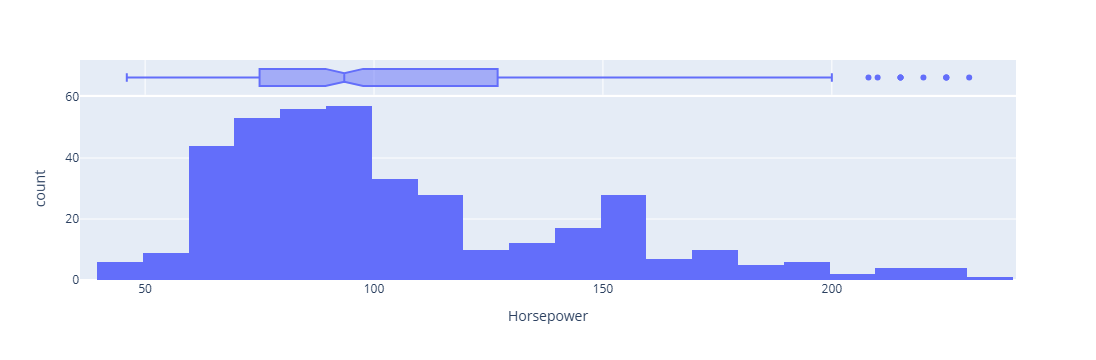

In [62]:
fig = px.histogram(
    data_frame=df_fuel,
    x='horsepower',
    marginal='box',
    labels={'horsepower': 'Horsepower'}
)

fig.show()

In [63]:
median_power = df_fuel['horsepower'].median()
df_fuel['horsepower'] = df_fuel['horsepower'].fillna(median_power)
df_fuel.isna().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
dtype: bool

In [64]:
categorical_columns = ['cylinders', 'model_year', 'origin']

for col in categorical_columns:
    print(
        f'Value counts of "{df_fuel[col].name}" column:\n{df_fuel[col].value_counts()}')
    print()

Value counts of "cylinders" column:
cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64

Value counts of "model_year" column:
model_year
73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: count, dtype: int64

Value counts of "origin" column:
origin
1    249
3     79
2     70
Name: count, dtype: int64



In [65]:
# replace [1, 2, 3] with ['American', 'European', 'Japanese']
df_fuel['origin'] = df_fuel['origin'].replace(
    to_replace=[1, 2, 3], value=['American', 'European', 'Japanese'])

# convert dtype to 'category'
df_fuel['cylinders'] = df_fuel['cylinders'].astype('category')
df_fuel['model year'] = df_fuel['model_year'].astype('category')
df_fuel['origin'] = df_fuel['origin'].astype('category')

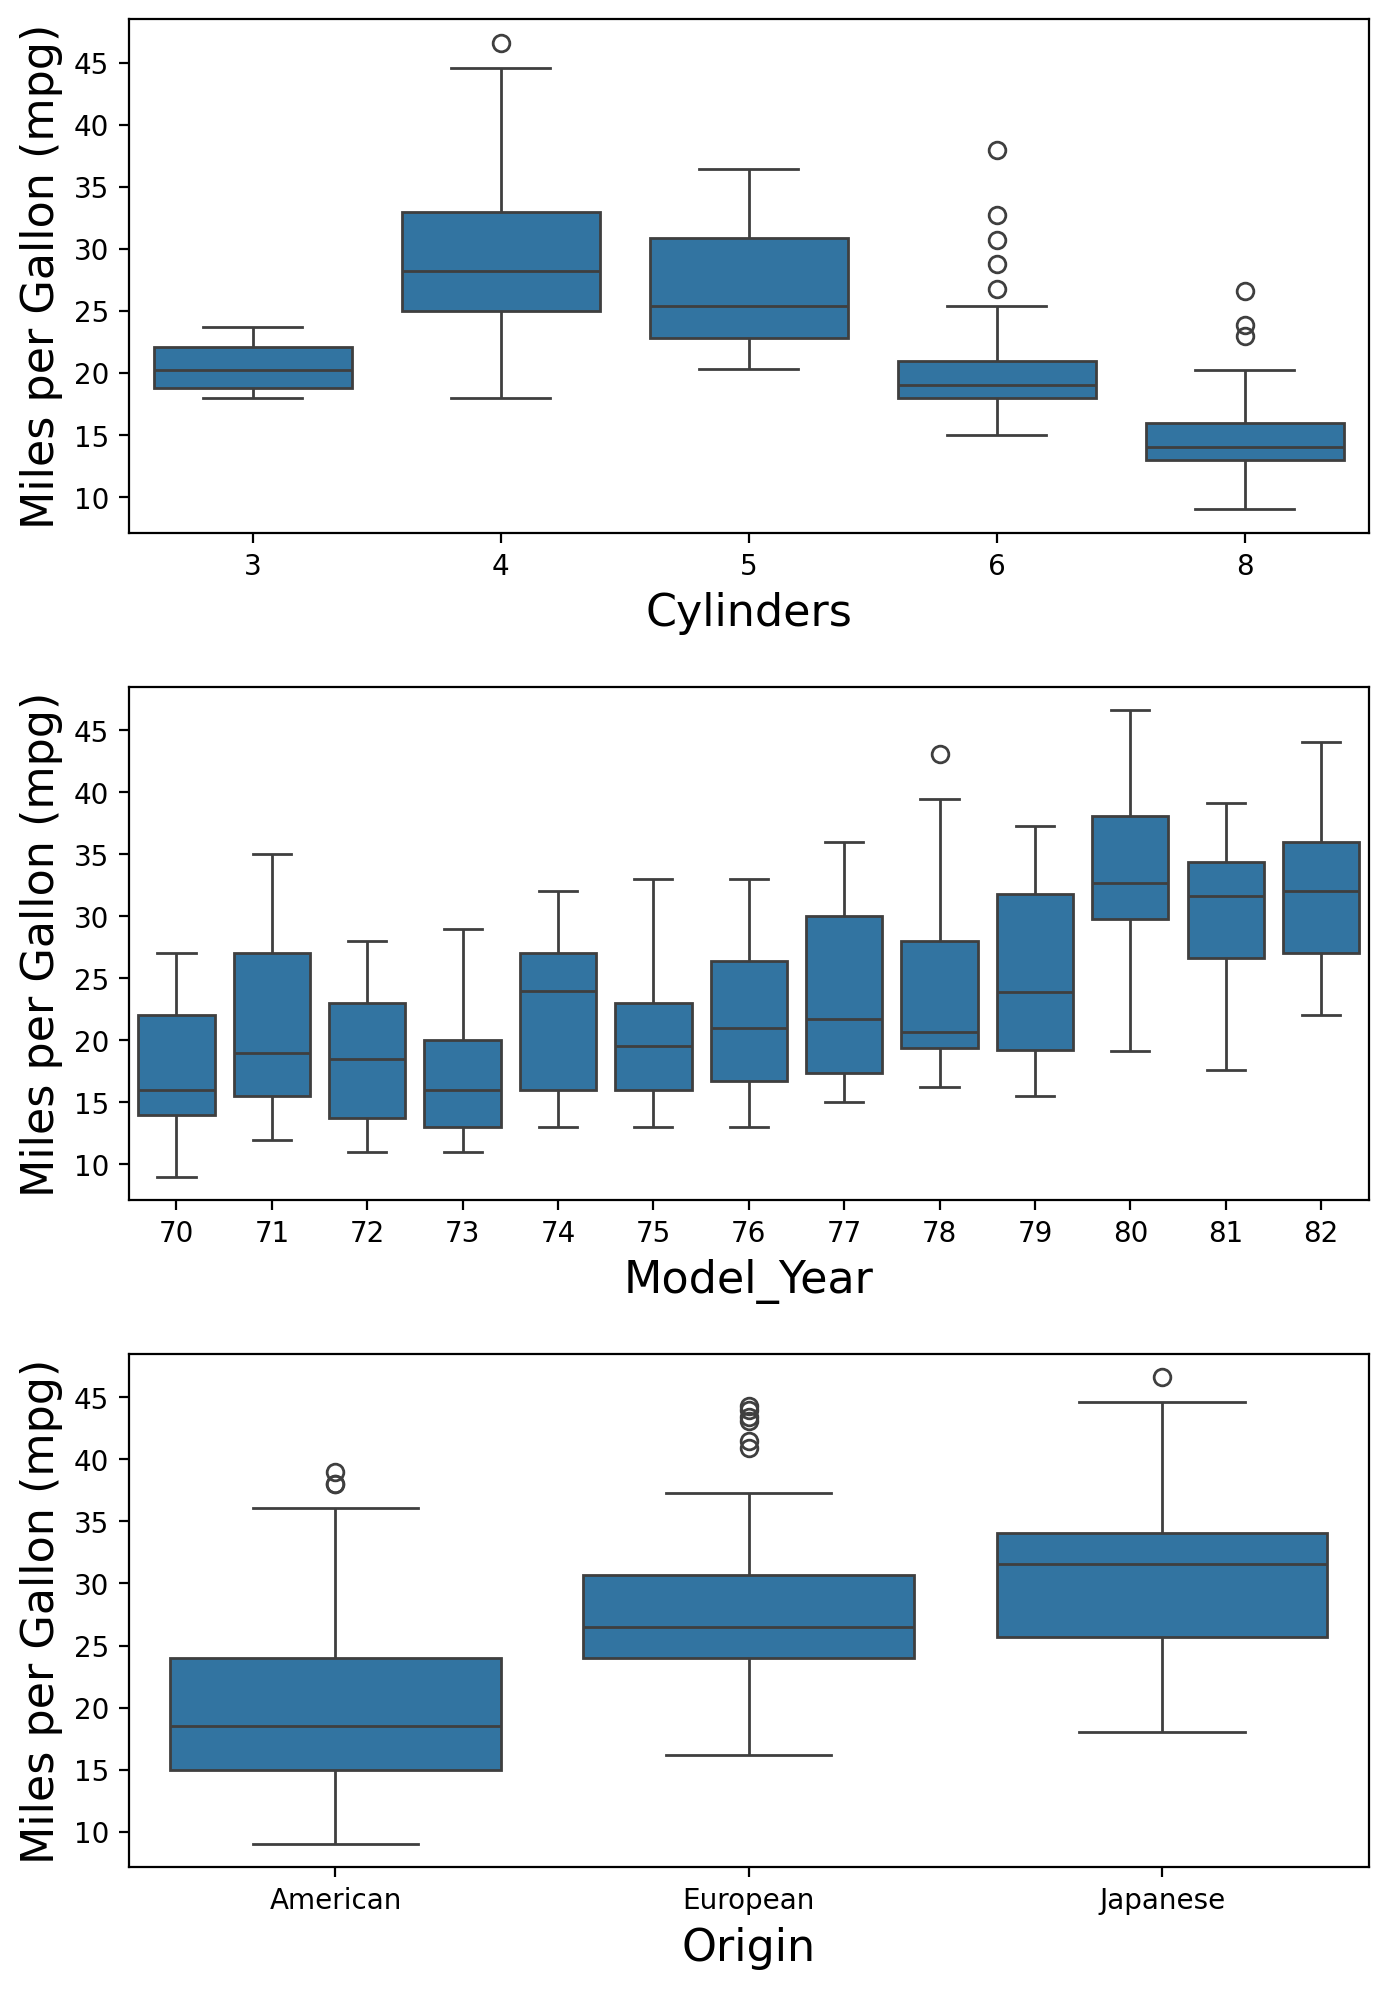

In [70]:
fig, axes = plt.subplots(figsize=(8, 12), dpi=200,
                         nrows=3, ncols=1, gridspec_kw={'hspace': 0.3})

for i, col in enumerate(categorical_columns):
    sns.boxplot(x=col, y='mpg', data=df_fuel, ax=axes[i])
    axes[i].set_ylabel('Miles per Gallon (mpg)', fontsize=16)
    axes[i].set_xlabel(col.title(), fontsize=16)

plt.show()

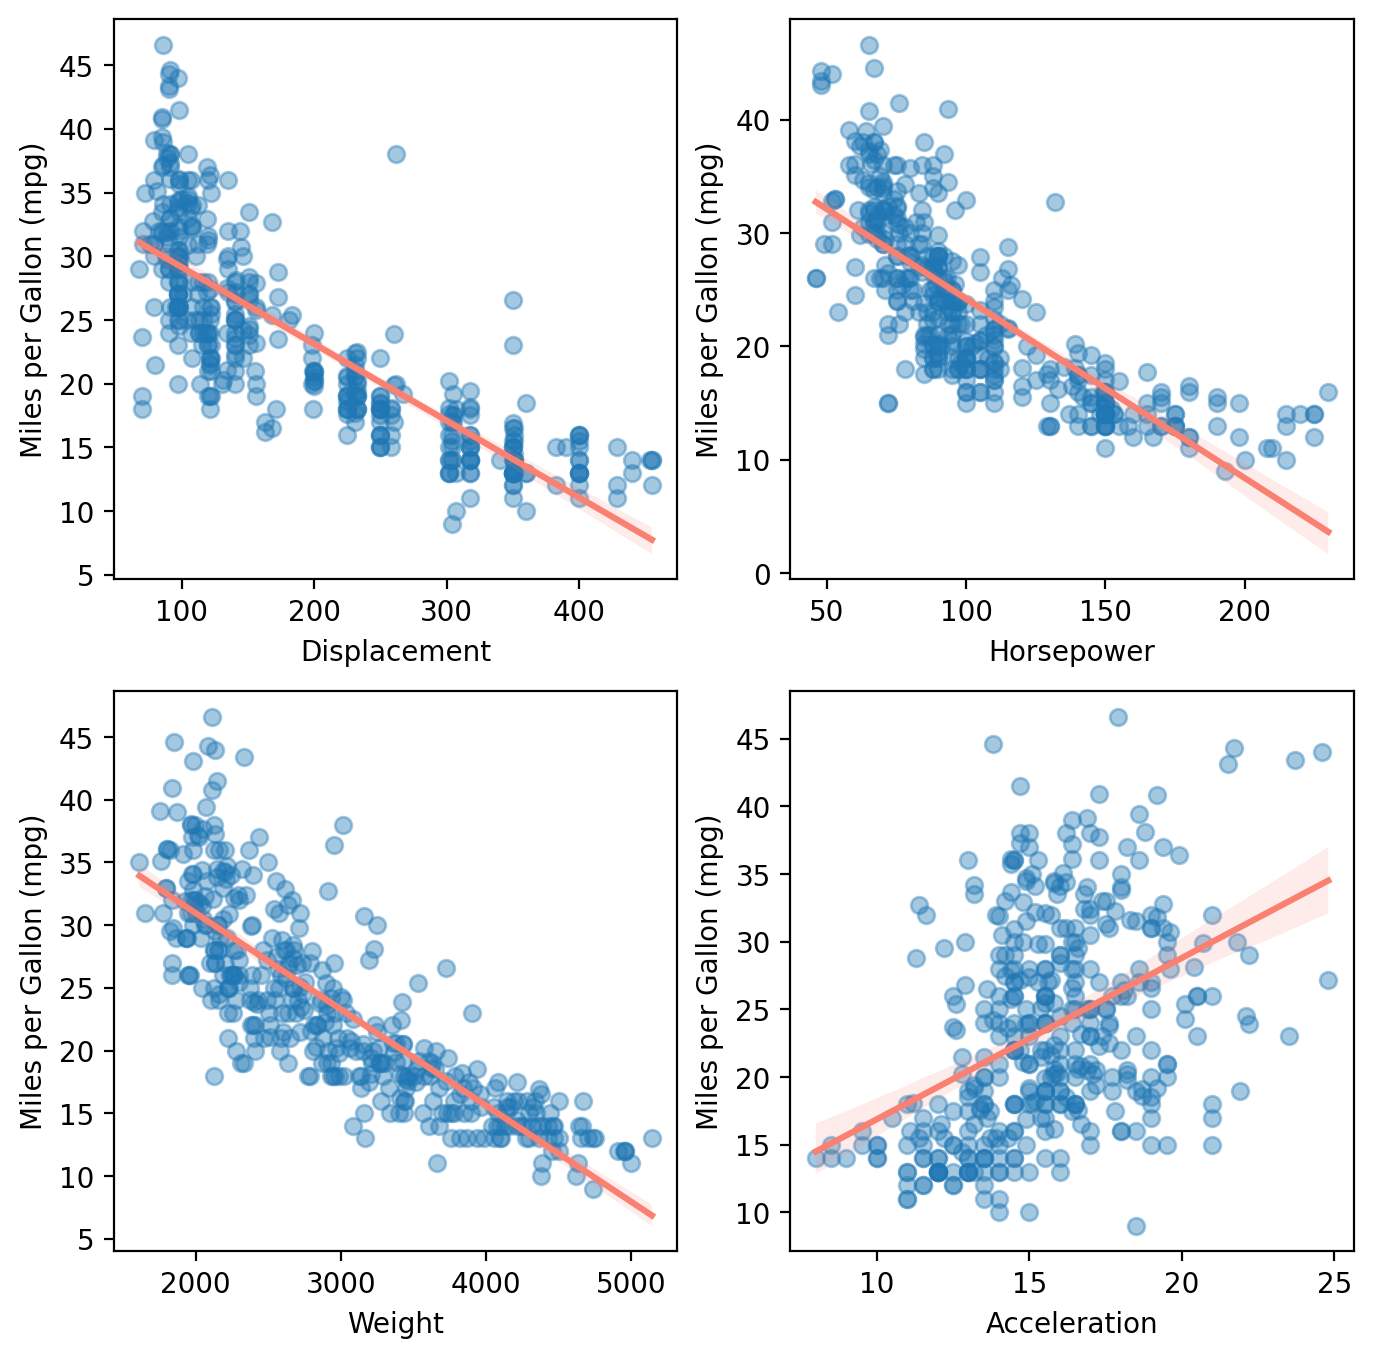

In [72]:
continuous_columns = ['displacement', 'horsepower', 'weight', 'acceleration']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), dpi=200, gridspec_kw={'wspace': 0.2,
                                                                                  'hspace': 0.2})

# upper left axe
sns.regplot(data=df_fuel, x=continuous_columns[0], y='mpg',
            fit_reg=True, ax=axes[0, 0],
            line_kws={'color': 'salmon'},
            scatter_kws={'alpha': 0.4})
axes[0, 0].set_ylabel('Miles per Gallon (mpg)', fontsize=10)
axes[0, 0].set_xlabel(continuous_columns[0].title(), fontsize=10)

# upper right axe
sns.regplot(data=df_fuel, x=continuous_columns[1], y='mpg',
            fit_reg=True, ax=axes[0, 1],
            line_kws={'color': 'salmon'},
            scatter_kws={'alpha': 0.4})
axes[0, 1].set_ylabel('Miles per Gallon (mpg)', fontsize=10)
axes[0, 1].set_xlabel(continuous_columns[1].title(), fontsize=10)

# lower left axe
sns.regplot(data=df_fuel, x=continuous_columns[2], y='mpg',
            fit_reg=True, ax=axes[1, 0],
            line_kws={'color': 'salmon'},
            scatter_kws={'alpha': 0.4})
axes[1, 0].set_ylabel('Miles per Gallon (mpg)', fontsize=10)
axes[1, 0].set_xlabel(continuous_columns[2].title(), fontsize=10)

# lower right axe
sns.regplot(data=df_fuel, x=continuous_columns[3], y='mpg',
            fit_reg=True, ax=axes[1, 1],
            line_kws={'color': 'salmon'},
            scatter_kws={'alpha': 0.4})
axes[1, 1].set_ylabel('Miles per Gallon (mpg)', fontsize=10)
axes[1, 1].set_xlabel(continuous_columns[3].title(), fontsize=10)

plt.show()

In [82]:
X = df_fuel.drop(['mpg', 'car_name'], axis=1)
y = df_fuel['mpg']

KeyError: "['car_name'] not found in axis"